In [7]:
pip install ultralyticsplus==0.0.28 ultralytics==8.0.43


In [10]:
from ultralyticsplus import YOLO, render_result
from PIL import Image
import os

# load model
model = YOLO('foduucom/table-detection-and-extraction')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
# - Purpose: The confidence threshold determines the minimum confidence level
# a detection must have to be considered valid.
# - Details: For each detected object, YOLO outputs a confidence score indicating
# how certain it is that an object has been correctly identified. Setting a
# threshold of 0.25 means that only detections with a confidence score of 25% or
# higher will be kept. Detections with lower confidence scores will be discarded.
# - Effect: Lowering this value will allow more detections but may introduce more
# false positives (objects detected with lower confidence). Raising it will result
# in fewer, more confident detections, potentially missing objects with lower confidence scores.

model.overrides['iou'] = 0.45  # NMS IoU threshold
# - Purpose: The Intersection over Union (IoU) threshold is used to control Non-Maximum
# Suppression (NMS), a process that removes overlapping detections of the same object.
# - Details: When two or more detections overlap significantly (based on the IoU threshold),
# NMS keeps only the detection with the highest confidence score and discards the others. The
# IoU value is calculated by comparing the overlap area of bounding boxes. Setting iou = 0.45 means
# that if the overlap between two bounding boxes is greater than 45%, the lower-confidence box will be removed.
# - Effect: A lower IoU threshold (e.g., 0.3) will discard more overlapping boxes, potentially
# eliminating correct detections that are close to each other. A higher IoU threshold (e.g., 0.6)
# will retain more overlapping detections, which can result in multiple detections of the same object.

model.overrides['agnostic_nms'] = False  # NMS class-agnostic
# - Purpose: This setting controls whether Non-Maximum Suppression considers class labels when removing overlapping detections.
# - Details: When agnostic_nms is set to False, NMS will only remove overlapping detections if they belong to the same class. If set to True, NMS will treat all detections as the same class, removing overlapping detections regardless of class label.
# - Effect: Setting agnostic_nms to True can be useful in cases where the model detects multiple classes close together, such as when objects of different classes overlap. However, it may lead to false positives if objects of different classes are mistakenly suppressed.

model.overrides['max_det'] = 1000  # maximum number of detections per image
# - Purpose: This parameter sets an upper limit on the total number of objects that can be detected in a single image.
# - Details: max_det is useful when working with scenes that may contain many detectable objects (e.g., crowd scenes or dense foliage). Setting a high value like 1000 allows the model to detect up to 1000 objects in one image.
# - Effect: Setting a high max_det value increases the number of detections but can slow down inference and lead to more overlapping detections. Lowering max_det (e.g., to 100 or 200) can speed up inference but may cause the model to miss objects if the scene is dens

# Print all class names with their IDs
print("Class IDs and names:")
for class_id, class_name in model.names.items():
    print(f"ID: {class_id}, Name: {class_name}")



Class IDs and names:
ID: 0, Name: bordered
ID: 1, Name: borderless


/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:340: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load



image 1/1 /content/sample_data/test1_border_borderless.png: 352x640 1 bordered, 1 borderless, 337.3ms
Speed: 1.0ms preprocess, 337.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Predicted leaf name: borderless
Confidence: tensor([0.46131])
Bounding box coordinates: tensor([[  0., 813., 773., 888.]])
Class ID: tensor([1.])
---
Predicted leaf name: bordered
Confidence: tensor([0.42991])
Bounding box coordinates: tensor([[1086.,  174., 1393.,  776.]])
Class ID: tensor([0.])
---


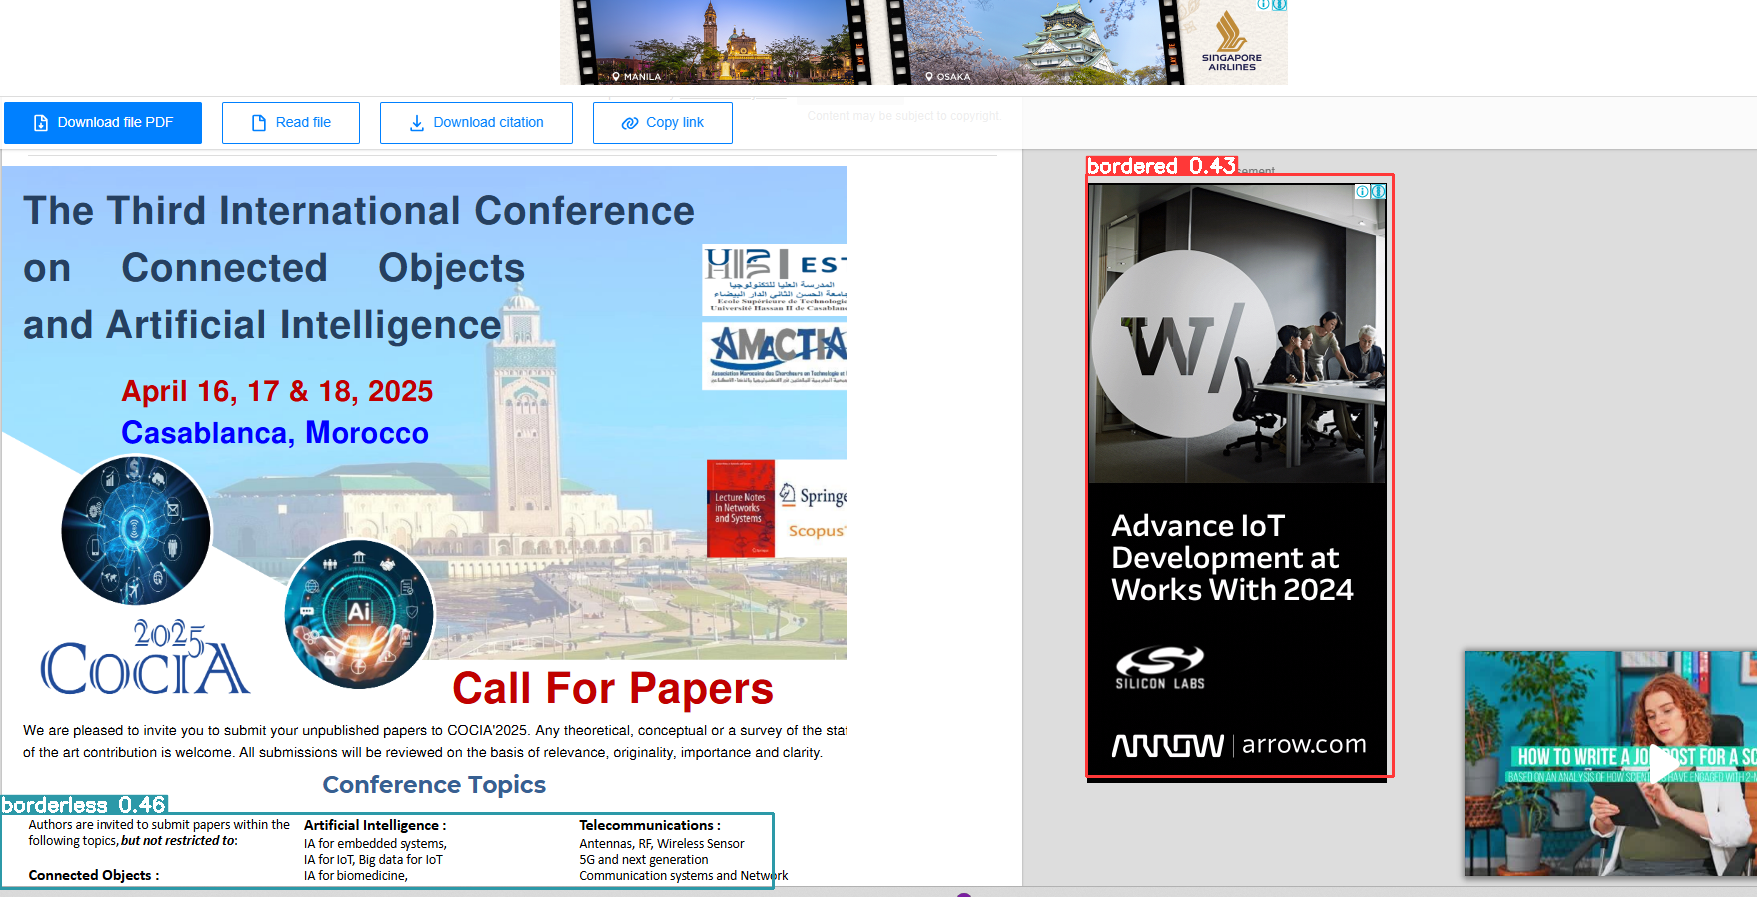

' \n\n'

In [31]:
# set image
image_name = 'test1_border_borderless.png'
image = os.path.join('/content/sample_data/',image_name)

# perform inference
results = model.predict(image)

# Print the name of each leaf predicted and associated metrics
for box in results[0].boxes:
    # Print the predicted class name
    leaf_name = model.names[int(box.cls)]
    print("Predicted leaf name:", leaf_name)

    # Print associated metrics
    print("Confidence:", box.conf)
    print("Bounding box coordinates:", box.xyxy)  # (x1, y1, x2, y2)
    print("Class ID:", box.cls)
    print("---")

# Render the result
rendered_image = render_result(model=model, image=image, result=results[0])

# Save the rendered image
output_path = os.path.join('/content/', 'rendered_' + image_name)
rendered_image.save(output_path)

# Display the image using PIL
display(Image.open(output_path))

"""

"""